In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os, glob

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

C:\Users\lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_img_list = glob.glob("fingers/train/*.png")
test_img_list = glob.glob("fingers/test/*.png")
print(len(train_img_list),
     len(test_img_list), sep = '\n')

18000
3600


In [3]:
def import_data():
    train_img_data = []
    test_img_data = []
    train_label_data = []
    test_label_data = []
    
    for img in train_img_list:
        img_read = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        img_read = cv2.resize(img_read, (128,128))
        train_img_data.append(img_read)
        train_label_data.append(int(img[-6]))
    
    for img in test_img_list:
        img_read = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        img_read = cv2.resize(img_read, (128,128))
        test_img_data.append(img_read)
        test_label_data.append(int(img[-6]))
        
    return np.array(train_img_data), np.array(test_img_data), np.array(train_label_data), np.array(test_label_data)

In [4]:
xtrain, xtest, ytrain, ytest = import_data()

In [5]:
ytrain.shape

(18000,)

In [6]:
from keras.utils import to_categorical 
xtrain = xtrain.reshape(xtrain.shape[0], 128, 128, 1)
xtest = xtest.reshape(xtest.shape[0], 128, 128, 1)

ytrain = to_categorical(ytrain, 6)
ytest = to_categorical(ytest, 6)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(18000, 128, 128, 1) (3600, 128, 128, 1) (18000, 6) (3600, 6)


In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (128, 128, 1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.40))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.40))
model.add(Dense(6, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       295168    
__________

In [8]:
import os



#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x = xtrain, y = ytrain, batch_size = 16, epochs = 10, validation_split=0.3)

Train on 12600 samples, validate on 5400 samples
Epoch 1/10
12600/12600 [==============================] - 19s 2ms/step - loss: 0.3921 - acc: 0.9108 - val_loss: 0.0046 - val_acc: 0.9983
Epoch 2/10
12600/12600 [==============================] - 11s 891us/step - loss: 0.0728 - acc: 0.9771 - val_loss: 0.0019 - val_acc: 0.9998
Epoch 3/10
12600/12600 [==============================] - 11s 889us/step - loss: 0.0641 - acc: 0.9808 - val_loss: 0.0056 - val_acc: 0.9989
Epoch 4/10
12600/12600 [==============================] - 11s 880us/step - loss: 0.0447 - acc: 0.9863 - val_loss: 0.0020 - val_acc: 0.9993
Epoch 5/10
12600/12600 [==============================] - 11s 884us/step - loss: 0.0352 - acc: 0.9883 - val_loss: 3.8220e-04 - val_acc: 1.0000
Epoch 6/10
12600/12600 [==============================] - 11s 886us/step - loss: 0.0272 - acc: 0.9916 - val_loss: 0.0015 - val_acc: 0.9996
Epoch 7/10
12600/12600 [==============================] - 11s 895us/step - loss: 0.0247 - acc: 0.9921 - val_loss: 6

In [12]:
loss, acc = model.evaluate(xtest, ytest)
print("loss: " + str(loss) , "acc: " + str(acc*100) + "%")

3600/3600 [==============================] - 1s 235us/step
loss: 8.849797212197548e-05 acc: 100.0%


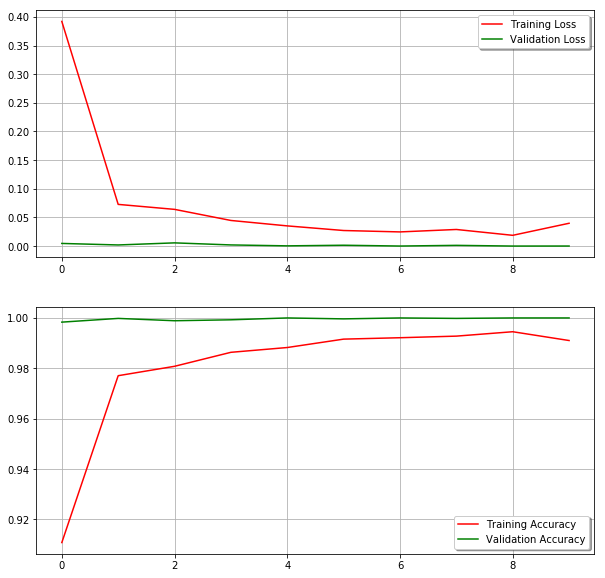

In [14]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(history.history['loss'], color='r', label='Training Loss')
ax[0].plot(history.history['val_loss'], color='g', label='Validation Loss')
ax[0].legend(loc='best',shadow=True)
ax[0].grid(True)

ax[1].plot(history.history['acc'], color='r', label='Training Accuracy')
ax[1].plot(history.history['val_acc'], color='g', label='Validation Accuracy')
ax[1].legend(loc='best',shadow=True)
ax[1].grid(True)
plt.savefig("result+"+"10"+".png")
plt.show()

In [15]:
model.save("finger_detection_model")